In [34]:
import warnings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Genres in Top 100 Profited Movies

One of a variable that pops into our brain when we hear the question "What is the best type of movie to make for maximum profit?" is genre.

### Import Data

In [15]:
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

### Combine Data Tables

With the two data tables, we will merge them using movie title and year the movie was released so that we can have one dataframe with production budget, worldwide gross, and genres variables. There were movies with same title but were not the same movie. So, we also use the year to merge the table as well.

In [16]:
# Create a column for year in movie_budget table
# Since release date is in "month day, year" format, we are going to take only the last four string of the release date and 
# we are going to change the year to float
movie_budgets['release_year'] = movie_budgets['release_date'].str[-4:].astype(float)

#Combine movie_budget table with title_basics using movie title and released year
profit = movie_budgets.merge(title_basics, how='left', left_on=['movie', 'release_year'], right_on=['original_title', 'start_year'])
profit.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019.0,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",2007.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017.0,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015.0,tt2379713,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller"


### Clean the dataframe

The dataframe now needs to be cleaned. We will drop any null values and duplicates from the data table. 

In [17]:
# Drop null values
profit.dropna(inplace=True)

In [18]:
# Make a new dataframe with just the columns we need
condensed_profit = profit[['movie', 'release_date', 'genres', 'production_budget', 'domestic_gross', 'worldwide_gross']]

In [19]:
# Drop any duplicates
condensed_profit = condensed_profit.drop_duplicates(subset=['movie'])

In [20]:
# Change the columns that are string numbers to float
# First, we remove the , by replace , with ''
# Since the production budget, domestic gross, worldwide gross has a dollar sign in the front,
# we want to take every after the dollar sign and make them into floats
condensed_profit['production_budget'] = condensed_profit['production_budget'].str.replace(',', '').str[1:].astype(float)
condensed_profit['domestic_gross'] = condensed_profit['domestic_gross'].str.replace(',', '').str[1:].astype(float)
condensed_profit['worldwide_gross'] = condensed_profit['worldwide_gross'].str.replace(',', '').str[1:].astype(float)

### Create new columns for Profit and Net Profit Margin

Now, we will use wordwide_gross and production_budget to find the profit of the movie. We also found the net profit margin because we wanted to make sure that the movie generated enough profit from its sales and whether production budget was being contained.

In [21]:
condensed_profit['profit'] = condensed_profit['worldwide_gross'] - condensed_profit['production_budget']
condensed_profit['net_profit_margin'] = (condensed_profit['profit'] / condensed_profit['worldwide_gross']) * 100

Then, we want to make sure our data set has movies that have good net profit margin. So we filter the data so that we only have movies that had net profit margin over 70% and sort it by profit.

In [22]:
# Sort by Net Profit Margin (>70%) and Profit
#condensed_profit = condensed_profit[condensed_profit['net_profit_margin'] > 70]
condensed_profit = condensed_profit.sort_values(by=['profit'], ascending=False)
condensed_profit.head(10)

,movie,release_date,genres,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
6,Avengers: Infinity War,"Apr 27, 2018","Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
33,Jurassic World,"Jun 12, 2015","Action,Adventure,Sci-Fi",215000000.0,652270625.0,1.648855e+09,1.433855e+09,86.960647
26,The Avengers,"May 4, 2012","Action,Adventure,Sci-Fi",225000000.0,623279547.0,1.517936e+09,1.292936e+09,85.177240
41,Black Panther,"Feb 16, 2018","Action,Adventure,Sci-Fi",200000000.0,700059566.0,1.348258e+09,1.148258e+09,85.166046
114,Jurassic World: Fallen Kingdom,"Jun 22, 2018","Action,Adventure,Sci-Fi",170000000.0,417719760.0,1.305773e+09,1.135773e+09,86.980890
157,Frozen,"Nov 22, 2013","Adventure,Animation,Comedy",150000000.0,400738009.0,1.272470e+09,1.122470e+09,88.211902
136,Beauty and the Beast,"Mar 17, 2017","Family,Fantasy,Musical",160000000.0,504014165.0,1.259200e+09,1.099200e+09,87.293517
681,Minions,"Jul 10, 2015","Adventure,Animation,Comedy",74000000.0,336045770.0,1.160336e+09,1.086336e+09,93.622538
3,Avengers: Age of Ultron,"May 1, 2015","Action,Adventure,Sci-Fi",330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
43,Incredibles 2,"Jun 15, 2018","Action,Adventure,Animation",200000000.0,608581744.0,1.242521e+09,1.042521e+09,83.903689


### Visualization

With the organized data, we can, now, use them to see what genres are popular in the top 100 most profited movies.

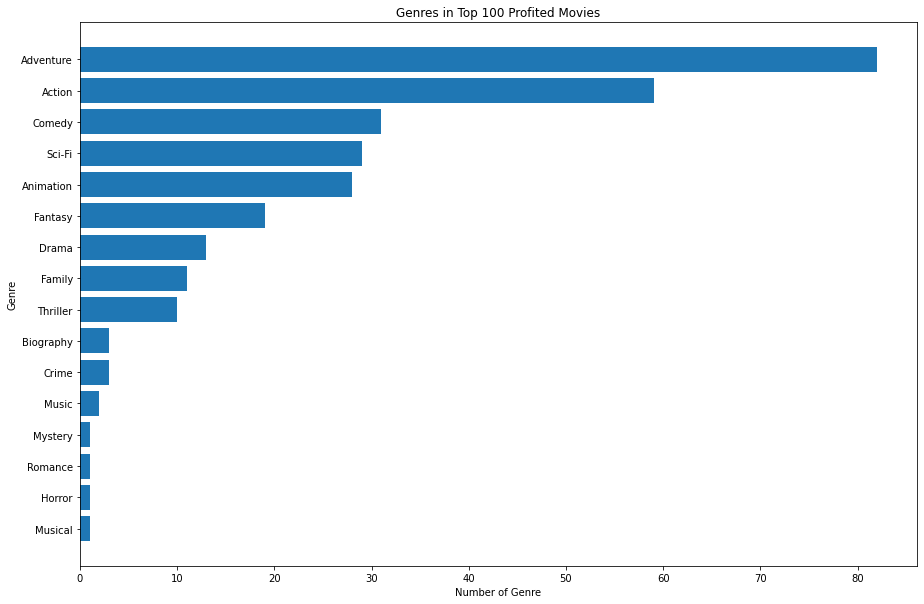

In [23]:
# Make a list of genres from the top 100 rows in the organized dataframe
genres = list(condensed_profit['genres'].iloc[:100])

top_100_profit_genre_list = []

# Split the genres for each movie by comma and append them into a new list
for genre in genres:
    each_genre = genre.split(',')
    for index in range(len(each_genre)):
        top_100_profit_genre_list.append(each_genre[index])

top_100_profit_genre_dict = {}

# Make a dictionary to count number of each genres
# For each genre, if the genre is in the dictionary, add a count to the value
# If not, then add a count to the value
for genre in top_100_profit_genre_list:
    if genre in top_100_profit_genre_dict.keys():
        top_100_profit_genre_dict[genre] += 1
    else:
        top_100_profit_genre_dict[genre] = 1
        
# Sort the dictionary by count
# We use lambda x while sorting so that we sort them by the values (x[1])
top_100_profit_genre_dict = dict(sorted(top_100_profit_genre_dict.items(), key=lambda x : x[1]))

# Make a bar chart to represent genres in top 100 profited movies
fig, ax = plt.subplots(figsize=(15, 10))

x = list(top_100_profit_genre_dict.keys())
height = list(top_100_profit_genre_dict.values())

ax.barh(x, height)
ax.set_title('Genres in Top 100 Profited Movies')
ax.set_xlabel('Number of Genre')
ax.set_ylabel('Genre')

plt.savefig('images/genres_in_top_100_profited_movies.png')

Now, we want to see average profit margin for each genre to see if we will make enough money on the genre for the amount spent on production. We will take the top 10 genres from the above data.

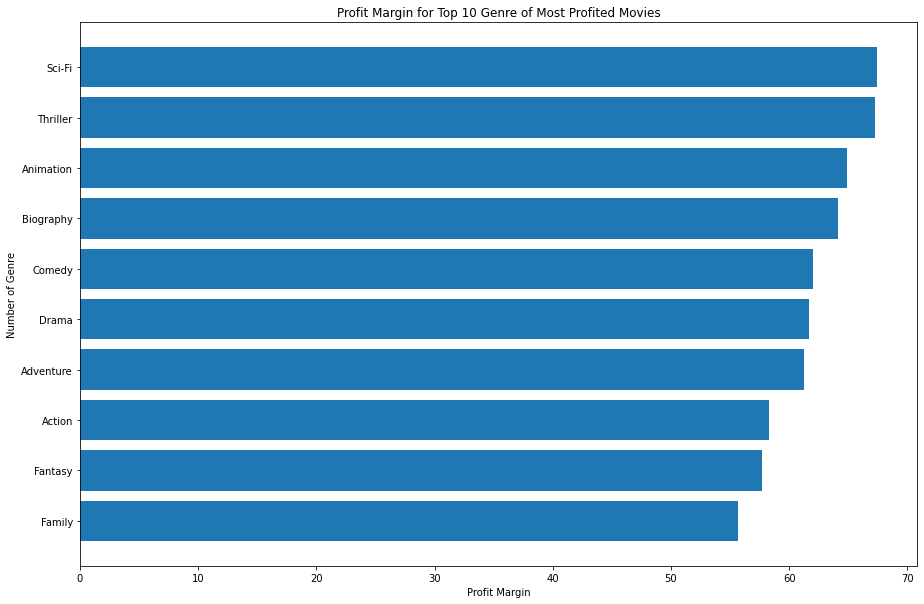

In [72]:
# Make a list of top 10 genres from the graph above
top10_genre = list(top_100_profit_genre_dict.keys())[-10:]

# Create a new dataframe so that we have data that have profit margin above 0%,
condensed_profit_split_genre = condensed_profit[condensed_profit['net_profit_margin'] >= 0]

# Split the genres for each movie by comma
condensed_profit_split_genre['genres'] = condensed_profit_split_genre['genres'].map(lambda x : x.split(','))
warnings.filterwarnings('ignore')

genre_profit_margin = {}

# For each genre in the top 10 genre list, make a list of profit margin for that certain genre
for genre in top10_genre:
    genre_profit_margin[genre] = []
    for index, row in condensed_profit_split_genre.iterrows():
        if genre in row['genres']:
            genre_profit_margin[genre].append(row['net_profit_margin'])

average_profit_margin_genre = {}

# For each genre, find the average of profit margin
for k,v in genre_profit_margin.items():
    average_profit_margin_genre[k] = sum(v)/ float(len(v))

# Sort the dictionary by count
# We use lambda x while sorting so that we sort them by the values (x[1])
average_profit_margin_genre = dict(sorted(average_profit_margin_genre.items(), key=lambda x : x[1]))

# Make a bar graph represents profit margin and top 10 genre
fig, ax = plt.subplots(figsize=(15, 10))

x = list(average_profit_margin_genre.keys())
height = list(average_profit_margin_genre.values())

ax.barh(x, height)
ax.set_title('Profit Margin for Top 10 Genre of Most Profited Movies')
ax.set_xlabel('Profit Margin')
ax.set_ylabel('Number of Genre')

plt.savefig('images/profit_margin_genre.png')

With the data from the graph above, we can see that all the top 10 genres show that there is a good profit margin. When comparing the Genres in Top 100 Profited Movies graph and Profit Margin vs. Top 10 Genre of Most Profited Movies graph, we see that Sci-Fi, Animation, and Comedy are in the top 5 in both graphs.

Since some movies have more than one genre, instead of spliting the genre like we did above, let's look for which set of genres are popular in the top 100 most profited movies.

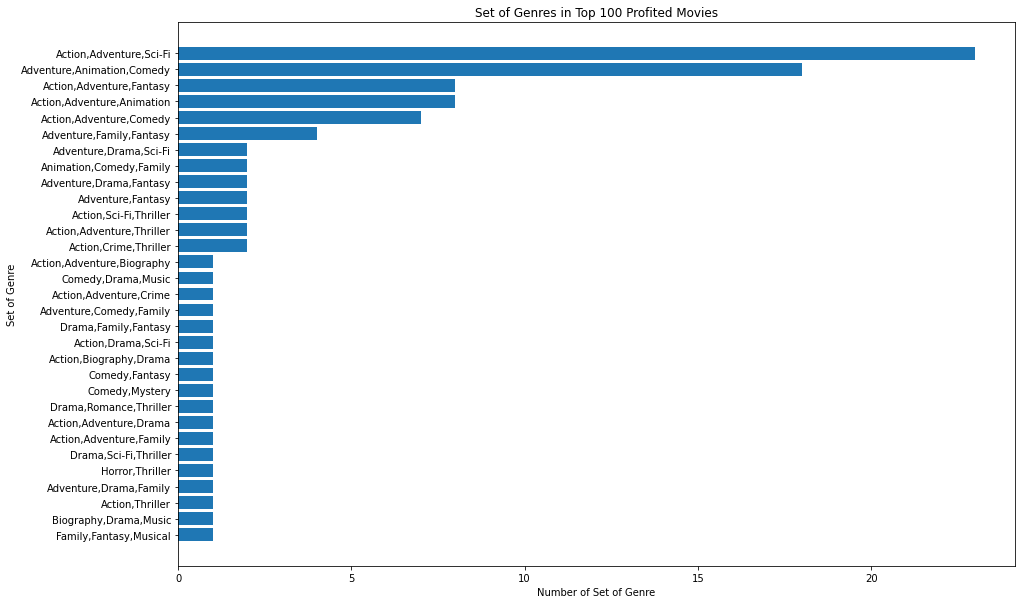

In [69]:
# Make a list of top 100 genres from the organized dataframe
top_100_profit_genre_set_list = list(condensed_profit['genres'].iloc[:100])

top_100_profit_genre_set_dict = {}

# Make a dictionary to count number of sets of genres
# For each set of genre, if the set of genre is in the dictionary, add a count to the value
# If not, then add a count to the value
for genre in top_100_profit_genre_set_list:
    if genre in top_100_profit_genre_set_dict.keys():
        top_100_profit_genre_set_dict[genre] += 1
    else:
        top_100_profit_genre_set_dict[genre] = 1

# Sort the dictionary by count
# We use lambda x while sorting so that we sort them by the values (x[1])
top_100_profit_genre_set_dict = dict(sorted(top_100_profit_genre_set_dict.items(), key=lambda x : x[1]))

#Make a bar chart to represent set of genres in top 100 profited movies
fig, ax = plt.subplots(figsize=(15, 10))

x = list(top_100_profit_genre_set_dict.keys())
height = list(top_100_profit_genre_set_dict.values())

ax.barh(x, height)
ax.set_title('Set of Genres in Top 100 Profited Movies')
ax.set_xlabel('Number of Set of Genre')
ax.set_ylabel('Set of Genre')

plt.savefig('images/set_of_genres_top_100_profited_movies.png')

Now, we want to see average profit margin for each set of genre to see if we will make enough money on the set of genre for the amount spent on production. We will take the top 10 set of genres from the above data.

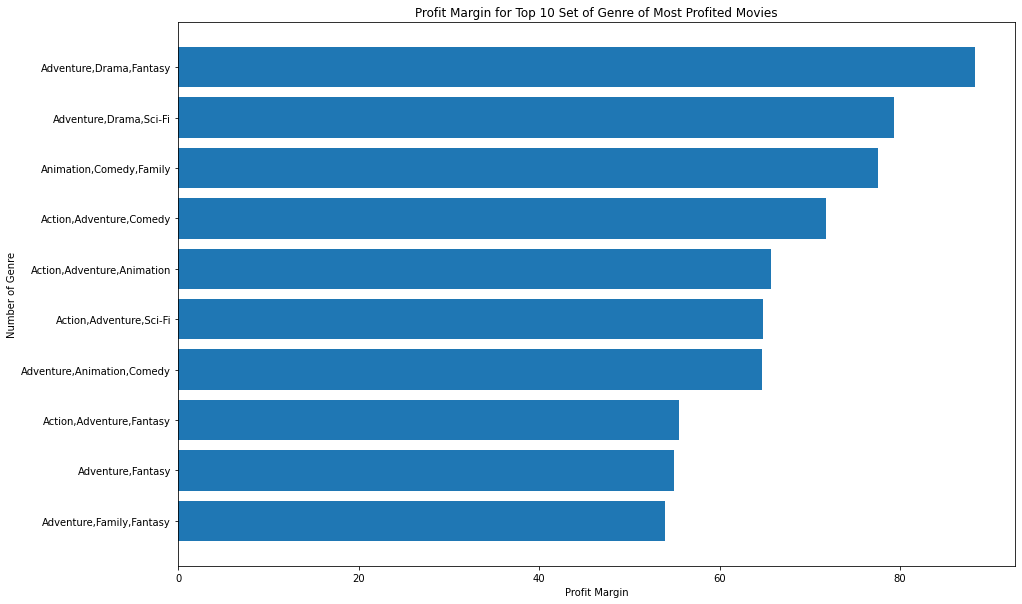

In [73]:
# Make a list of top 10 set of genres from the graph above
top10_set_genre = list(top_100_profit_genre_set_dict.keys())[-10:]

# Create a new dataframe so that we have data that have profit margin above 0%,
condensed_profit_split_genre_set = condensed_profit[condensed_profit['net_profit_margin'] >= 0]

genre_profit_margin_set = {}

# For each set of genres in the top 10 set of genres list, make a list of profit margin for that certain set of genres
for genre in top10_set_genre:
    genre_profit_margin_set[genre] = []
    for index, row in condensed_profit_split_genre_set.iterrows():
        if genre in row['genres']:
            genre_profit_margin_set[genre].append(row['net_profit_margin'])

average_profit_margin_genre_set = {}

# For each set of genres, find the average of profit margin
for k,v in genre_profit_margin_set.items():
    average_profit_margin_genre_set[k] = sum(v)/ float(len(v))

# Sort the dictionary by count
# We use lambda x while sorting so that we sort them by the values (x[1])
average_profit_margin_genre_set = dict(sorted(average_profit_margin_genre_set.items(), key=lambda x : x[1]))

# Make a bar graph that represents profit margin and top 10 genre
fig, ax = plt.subplots(figsize=(15, 10))

x = list(average_profit_margin_genre_set.keys())
height = list(average_profit_margin_genre_set.values())

ax.barh(x, height)
ax.set_title('Profit Margin for Top 10 Set of Genre of Most Profited Movies')
ax.set_xlabel('Profit Margin')
ax.set_ylabel('Number of Genre')

plt.savefig('images/profit_margin_set_genre.png')

With the data from the graph above, we can see that all the top 10 sets of genres show that there is a good profit margin. When comparing the Set of Genres in Top 100 Profited Movies graph and Profit Margin vs. Top 10 Set of Genre of Most Profited Movies graph, we see that "Action, Adventure, Comedy" and "Action, Adventure, Animation" are in the top 5 in both graphs.

## Conclusion